# **k-Nearest Neighbours Classifier**

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import sklearn # machine learning

# Import dataset

In [2]:
# import breast cancer dataset with sklearn
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset to Pandas DataFrame

In [3]:
# Put  into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target

In [4]:
# First 10 value of the dataset
df_breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Exploratory data analysis

In [5]:
# Shape of the dataset (nb of rows and columns)
print(df_breast_cancer.shape)

# Name of the columns
print(df_breast_cancer.columns)

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [6]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Description of Iris dataset (mean, std, min, max, quartiles)
print(df_breast_cancer.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

### Frequency distribution of values in categorical variables

In [8]:
# Names of the target values + newline
print(breast_cancer.target_names, "\n")

# Count of each target value
print(df_breast_cancer['target'].value_counts(), "\n")

# Same as above but in percentage
print(df_breast_cancer['target'].value_counts(normalize=True), "\n")

['malignant' 'benign'] 

target
1    357
0    212
Name: count, dtype: int64 

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64 



We can see that the dataset in balanced in terms of its classes.

### Missing values in variables

In [9]:
df_breast_cancer.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Number of missing values in each column
print(df_breast_cancer.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


We can see that there are no missing values in the dataset.

## Correlation between variables

In [11]:
# Correlation matrix between all the features
df_breast_cancer.drop(['target'],axis=1).corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


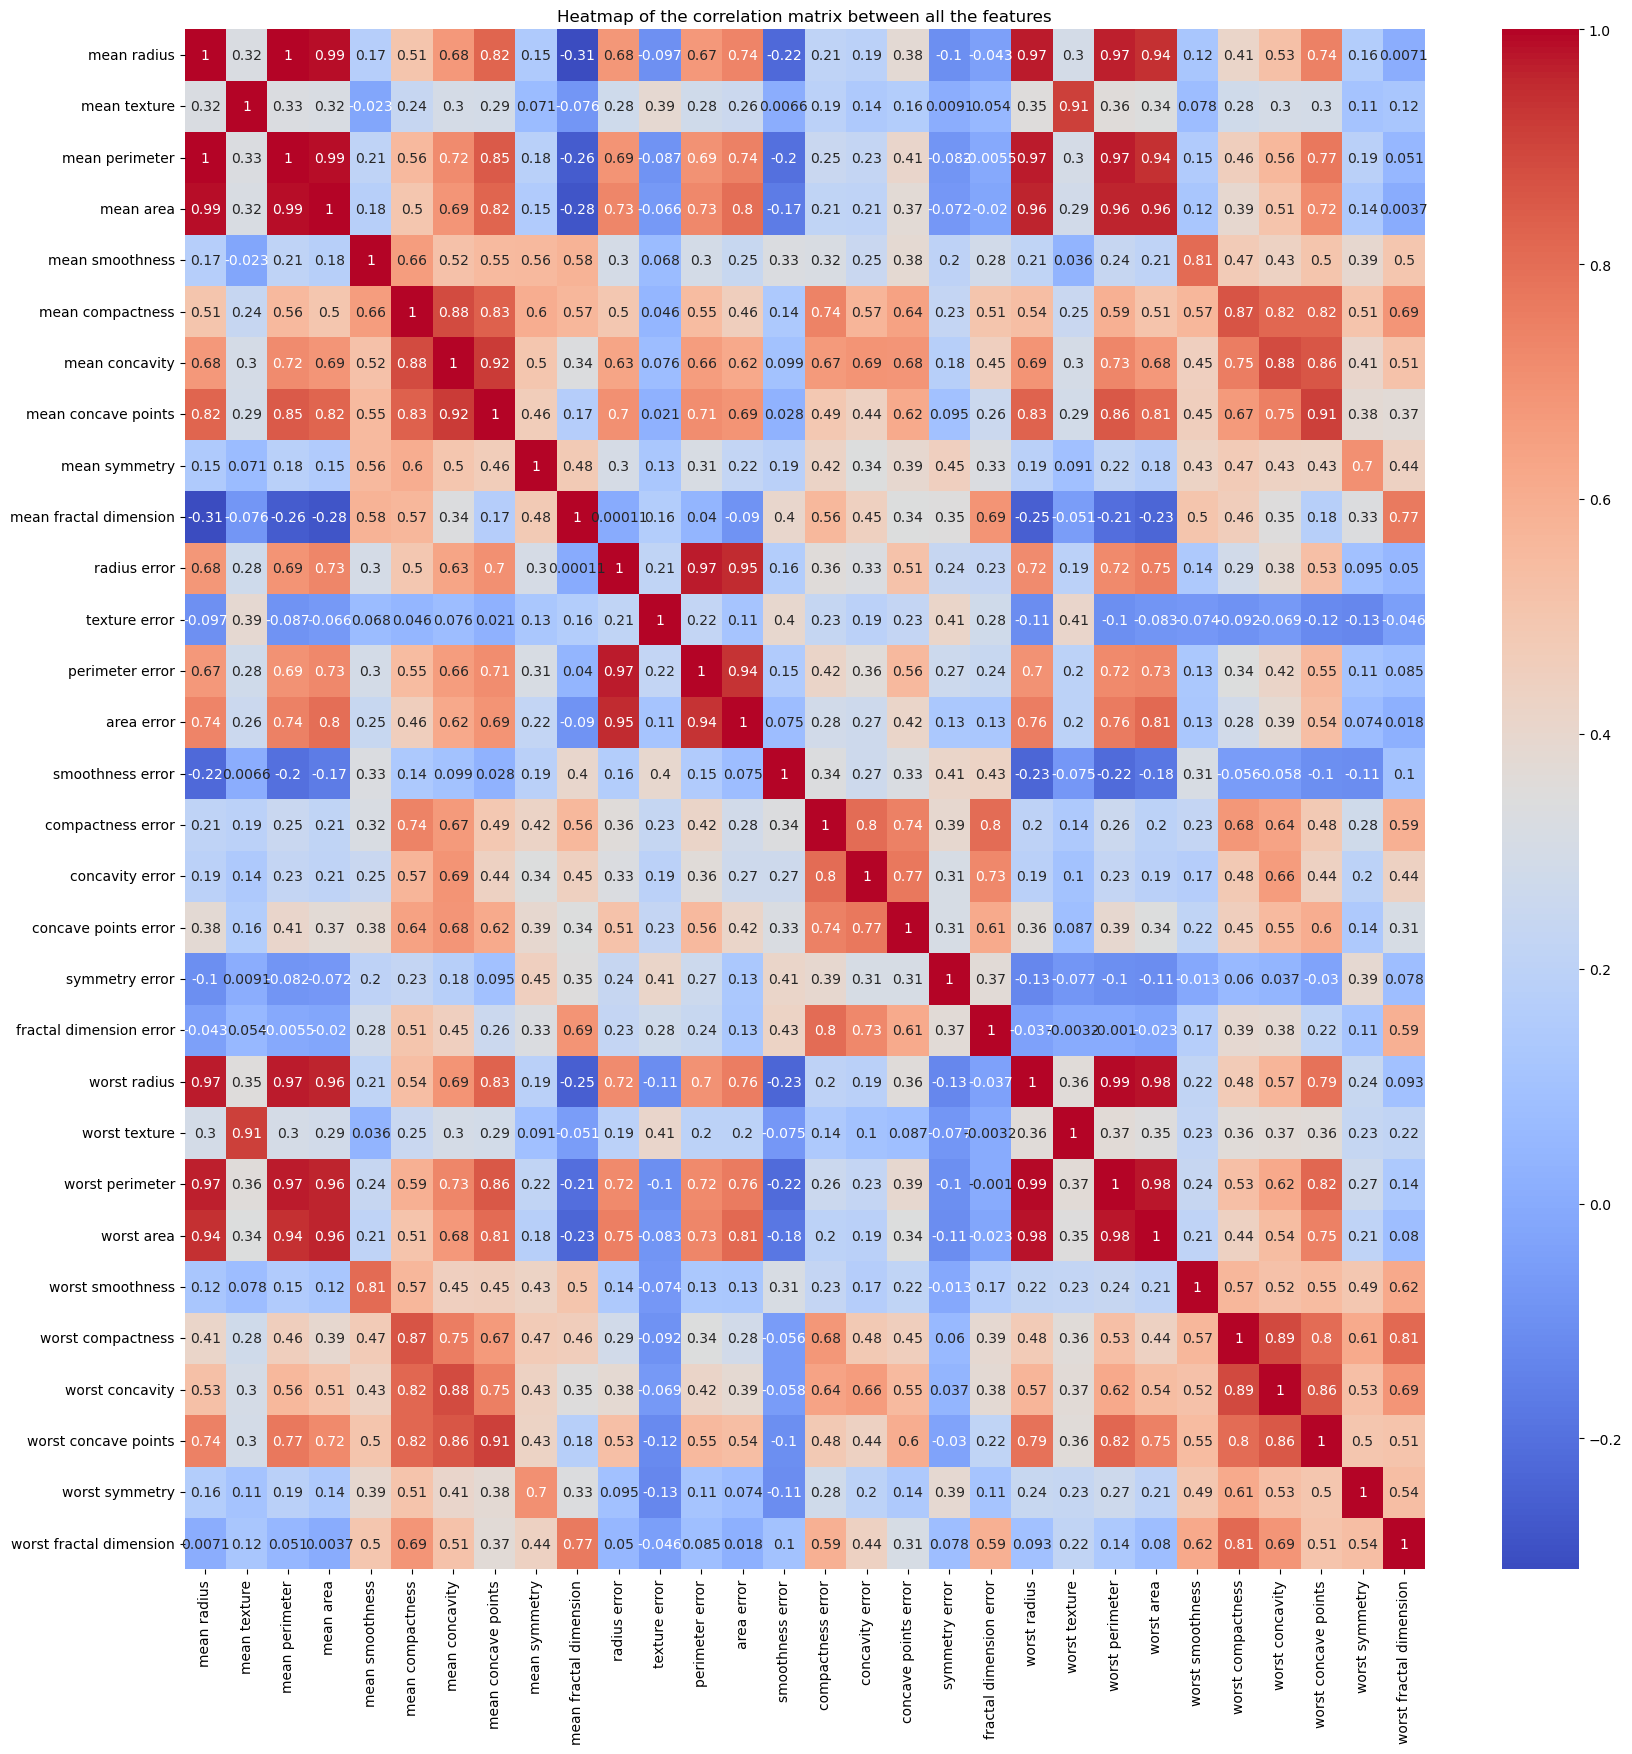

In [12]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
plt.title("Heatmap of the correlation matrix between all the features")
# Annot = True to print the values inside the square
sns.heatmap(df_breast_cancer.drop('target',axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
def rapport_corr(cible,data): #fonction qui calcule le rapport de corrélation
    #cible : 1 variable qualitative
    #data : un DataFrame qui contient des variables quantitatives
    #moyenne par variable
    m=data.mean()
    #SCT : variabilité totale = nbre d'ind*variance
    SCT=data.shape[0]*data.var(ddof=0)
    #DataFrame conditionnellement aux groupes
    Xb=data.groupby(cible)
    #effectifs conditionnels
    nk=Xb.size()
    #moyennes conditionnelles dans chaque groupe
    mk=Xb.mean()
    #pour chaque groupe écart à la moyenne par variable
    EMk=(mk-m)**2
    #pondéré par les effectifs du groupe
    EM=EMk.multiply(nk,axis=0)
    #somme des valeurs
    SCE=np.sum(EM,axis=0)
    #carré du rapport de corrélation
    R2=SCE/SCT
    R2trie=R2.sort_values(ascending=False)
    print(R2trie)
    #print(R2trie.index)
    plt.bar(range(1,R2trie.shape[0]+1),height=R2trie)
    return np.sqrt(R2)

worst concave points       0.629747
worst perimeter            0.612955
mean concave points        0.603129
worst radius               0.602880
mean perimeter             0.551508
worst area                 0.538499
mean radius                0.532942
mean area                  0.502658
mean concavity             0.484917
worst concavity            0.435086
mean compactness           0.355852
worst compactness          0.349279
radius error               0.321641
perimeter error            0.309292
area error                 0.300563
worst texture              0.208760
worst smoothness           0.177633
worst symmetry             0.173301
mean texture               0.172379
concave points error       0.166499
mean smoothness            0.128565
mean symmetry              0.109229
worst fractal dimension    0.104893
compactness error          0.085849
concavity error            0.064379
fractal dimension error    0.006080
smoothness error           0.004491
mean fractal dimension     0

mean radius                0.730029
mean texture               0.415185
mean perimeter             0.742636
mean area                  0.708984
mean smoothness            0.358560
mean compactness           0.596534
mean concavity             0.696360
mean concave points        0.776614
mean symmetry              0.330499
mean fractal dimension     0.012838
radius error               0.567134
texture error              0.008303
perimeter error            0.556141
area error                 0.548236
smoothness error           0.067016
compactness error          0.292999
concavity error            0.253730
concave points error       0.408042
symmetry error             0.006522
fractal dimension error    0.077972
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782914
worst area                 0.733825
worst smoothness           0.421465
worst compactness          0.590998
worst concavity            0.659610
worst concave points       0

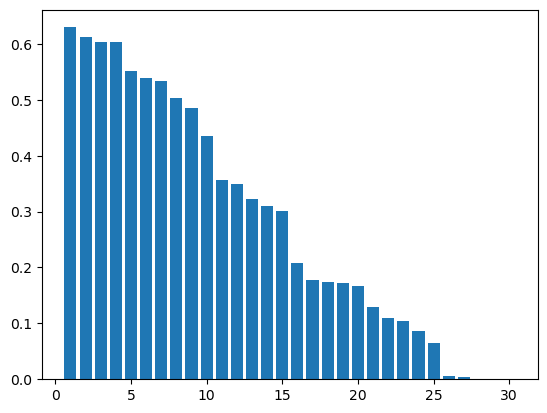

In [14]:
# Correlation matrix between each of the features and the target
rapport_corr(df_breast_cancer['target'],df_breast_cancer.drop('target',axis=1))

### Plot some data

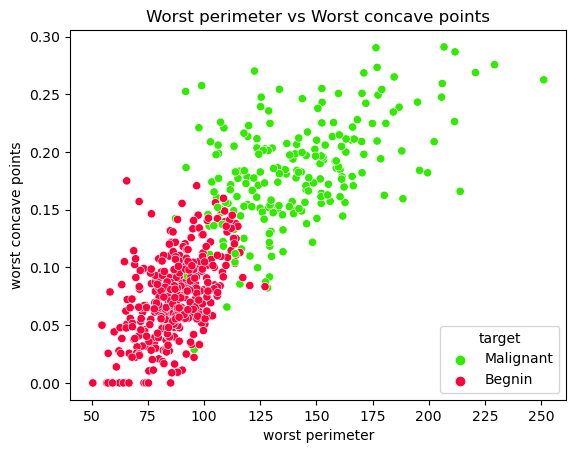

In [15]:
# converting the data into categorical
df_breast_cancer['target'] = df_breast_cancer['target'].map({0: 'Malignant', 1: 'Begnin'})

# Plot the 2 most correlated features with the target variable
sns.scatterplot(x='worst perimeter', y='worst concave points',
                data=df_breast_cancer, hue='target', palette='prism')
plt.title("Worst perimeter vs Worst concave points")
plt.show()

# converting the data back into numerical
df_breast_cancer['target'] = df_breast_cancer['target'].map({'Malignant': 0, 'Begnin': 1})

# Split data into separate training and test sets

In [16]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
# Check the shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [18]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

target
1    0.626374
0    0.373626
Name: proportion, dtype: float64
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


# Data Encoding

In [19]:
# check data types in X_train
X_train.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

All data is numerical, so we don't need to do any encoding.

# K-Nearest Neighbours Classifier

<!-- Add an image link in markdown in a smaller size: -->
![knn](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png) 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with 8 neighbors
model = KNeighborsClassifier(n_neighbors=8)
# Train the model using the training sets
model.fit(X_train, y_train)

# Accuracy of the model on the training set
print(model.score(X_train, y_train))

0.9340659340659341


In [21]:
# Predict the response for test dataset
predict = model.predict(X_test)

# Accuracy of the model on the testing set
print(accuracy_score(predict, y_test))

0.9473684210526315


## Plot the accuracy of the model on training and testing set for different k neighbours

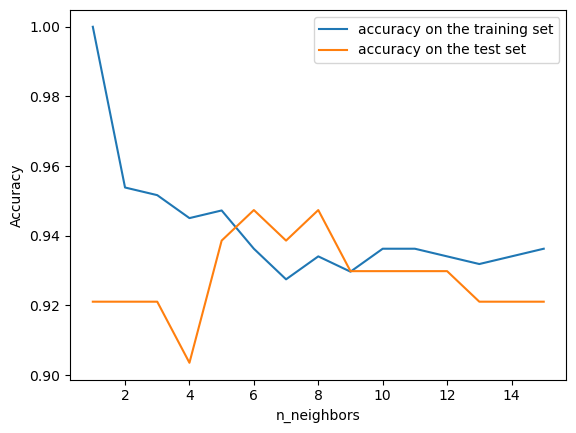

In [22]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # build the model
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(model.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="accuracy on the training set")
plt.plot(neighbors_settings, test_accuracy, label="accuracy on the test set")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

We can see that the accuracy of the model is highest when k=1. This is because the model is overfitting the training set. The accuracy of the model on the testing set is highest when k=8. This is because the model is generalising well.

# Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [23]:
# Plot the classification report for k=8
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Confusion matrix

A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category. 


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



Confusion Matrice for K=8:


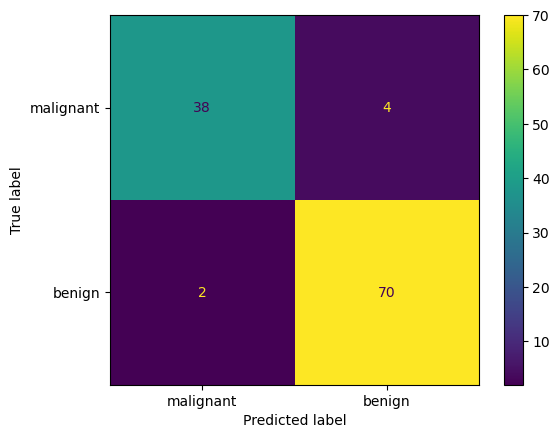

In [24]:
print("Confusion Matrice for K=8:")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot()
plt.show()

# Cross Validation 

In [25]:
from sklearn.model_selection import cross_val_score

# Cross validation with 5 different splits
scores = cross_val_score(model, df_breast_cancer.drop('target', axis=1), df_breast_cancer['target'], cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.86842105 0.93859649 0.93859649 0.95614035 0.94690265]
Mean cross-validation score: 0.93
Standard deviation of cross-validation score: 0.03


# ROC and AUC

- The ROC (Receiver Oerating Characteristic) curve is a graph that shows how well a classification model distinguishes between two classes :  <br> 
It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds. <br> <br>

- The AUC (Area Under the Curve) score is a single number summarizing the ROC curve. <br>
A perfect model has an AUC of 1.0, and a random model has an AUC of 0.5. <br> <br>

- The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the higher the AUC, the better the model is at distinguishing between patients with disease and no disease.

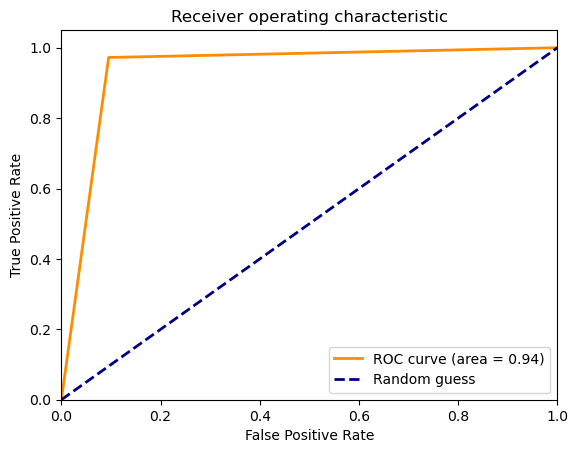

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Boundary

Decision Boundaries shows the decision regions of the classifier. It is a line or a curve that separates the decision regions of the classifier.

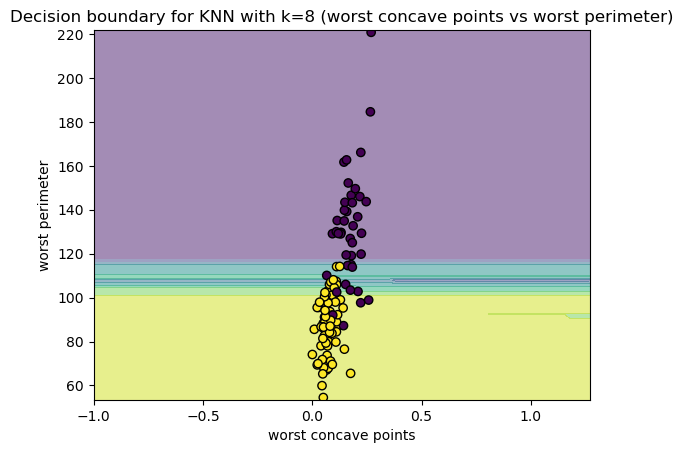

In [27]:
# Print decision boundary for KNN classifier over the most correlated features
from sklearn.inspection import DecisionBoundaryDisplay

# Decision boundary for worst concave points vs worst perimeter
X_train_boundary = X_train[['worst concave points', 'worst perimeter']].values
X_test_boundary = X_test[['worst concave points', 'worst perimeter']].values

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_boundary, y_train)

disp = DecisionBoundaryDisplay.from_estimator(knn_classifier, X_test_boundary, xlabel='worst concave points',
                                              ylabel='worst perimeter', alpha=0.5)
disp.ax_.scatter(X_test_boundary[:, 0], X_test_boundary[:, 1], c=y_test, edgecolor="k")
plt.title("Decision boundary for KNN with k=8 (worst concave points vs worst perimeter)")
plt.show()

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique. It is used to reduce the number of features in a dataset. It is used to reduce the complexity of the model and to reduce the training time. It is also used to visualise high dimensional data.

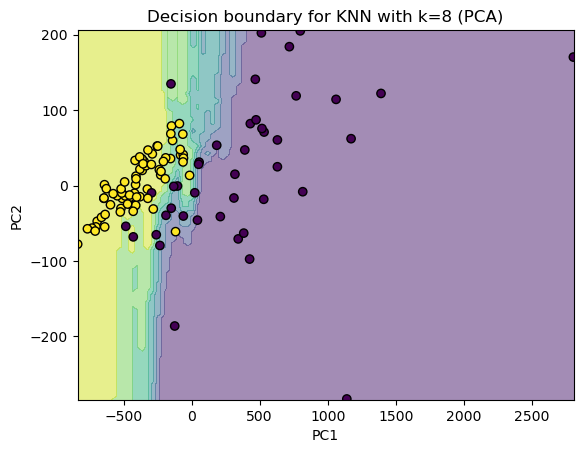

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 principal components for 2D plot
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_pca, y_train)

disp = DecisionBoundaryDisplay.from_estimator(knn_classifier, X_test_pca, xlabel='PC1',
                                              ylabel='PC2', alpha=0.5)
disp.ax_.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor="k")
plt.title("Decision boundary for KNN with k=8 (PCA)")
plt.show()

# References : 
1. https://scikit-learn.org/
2. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
3. https://www.kaggle.com/code/prashant111/knn-classifier-tutorial